In [14]:
import pandas as pd
import nltk
from plotly import graph_objects as go
import matplotlib.pyplot as plt

venta  = pd.read_excel("VH.xlsx")

df = pd.read_excel("conproducto.xlsx")

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
venta2

,Record ID,Ahora en Workflow,Análisis exhaustivo de fuente más reciente 1,Cantidad de sesiones,Contacto sin trabajar,Estado de contacto de marketing,Estado del lead,Estatus,Fecha de creación,Fecha de la fuente más reciente,...,Fuente original,Ingresos del evento,Número de envíos de formularios,Número de finalizaciones de eventos,Número de formularios únicos enviados,Número de vistas de página,Promedio de vistas de página,Tipo de producto,Today's date,conteo
541,305851,Falso,begud.cl/r4/seguro/ahorro,176.0,False,Contacto de marketing,Contactado,Con simulacion vida,2021-11-18,2023-01-09,...,Tráfico directo,0.0,375.0,0.0,10.0,521.0,2.0,fallecimiento,2022-08-29,1
540,561051,Falso,Facebook,3.0,True,Contacto de marketing,Nuevo,Con simulacion salud,2021-12-19,2022-12-06,...,Otras campañas,0.0,7.0,0.0,3.0,5.0,1.0,seguro de salud,2022-08-29,1
539,745101,Falso,begud.cl/productos/seguro/salud,96.0,True,Contacto de marketing,Nuevo,Con simulacion salud,2022-02-21,2022-12-19,...,Tráfico directo,0.0,113.0,0.0,5.0,259.0,2.0,seguro de salud,2022-08-29,1
538,702751,Falso,www.begiver.cl/v2/muvu/seguro/salud,8.0,True,Contacto de marketing,Nuevo,Con simulacion salud,2022-04-09,2022-11-03,...,Tráfico directo,0.0,25.0,0.0,2.0,24.0,3.0,seguro de salud,2022-08-29,1
537,1482001,Falso,www.begiver.cl/muvu/seguro/salud,8.0,True,Contacto de marketing,Nuevo,Con simulacion salud,2022-04-25,2022-12-07,...,Tráfico directo,0.0,19.0,0.0,2.0,31.0,3.0,seguro de salud,2022-08-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,4103501,Falso,Facebook,1.0,True,Contacto de marketing,Nuevo,Con simulacion salud,2023-01-12,2023-01-12,...,Redes sociales de pago,0.0,1.0,0.0,1.0,0.0,0.0,seguro de salud,2023-01-12,1
15,4103451,Falso,Facebook,1.0,True,Contacto de marketing,Nuevo,Con simulacion salud,2023-01-12,2023-01-12,...,Redes sociales de pago,0.0,1.0,0.0,1.0,0.0,0.0,seguro de salud,2023-01-12,1
16,4103401,Falso,Facebook,1.0,True,Contacto de marketing,Contactado,Con simulacion salud,2023-01-12,2023-01-12,...,Redes sociales de pago,0.0,1.0,0.0,1.0,0.0,0.0,seguro de salud,2023-01-12,1
8,4104151,Falso,Facebook,1.0,True,Contacto de marketing,Contactado,Con simulacion salud,2023-01-12,2023-01-12,...,Redes sociales de pago,0.0,1.0,0.0,1.0,0.0,0.0,seguro de salud,2023-01-12,1


In [2]:
#elimino columnas inutiles
venta = venta.dropna(axis=1)


In [3]:
venta2 = venta.drop('Estado de contacto de marketing', axis=1)
venta2 = venta.drop('Contacto de marketing hasta la siguiente actualización', axis=1)

venta2 = venta2.assign(conteo=1)



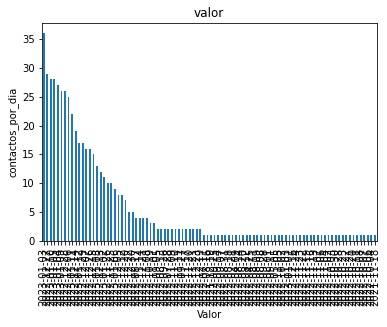

In [4]:
#preparo los datos para hacer la linea de tiempo


venta2['Fecha de creación'] = pd.to_datetime(venta2['Fecha de creación'])

venta2['Fecha de creación'] = venta2['Fecha de creación'].dt.date

contactos_por_dia = venta2['Fecha de creación'].value_counts()

#linea de tiempo de creacion



contactos_por_dia.plot(kind='bar')
plt.title('valor')
plt.xlabel('Valor')
plt.ylabel('contactos_por_dia')
plt.show()

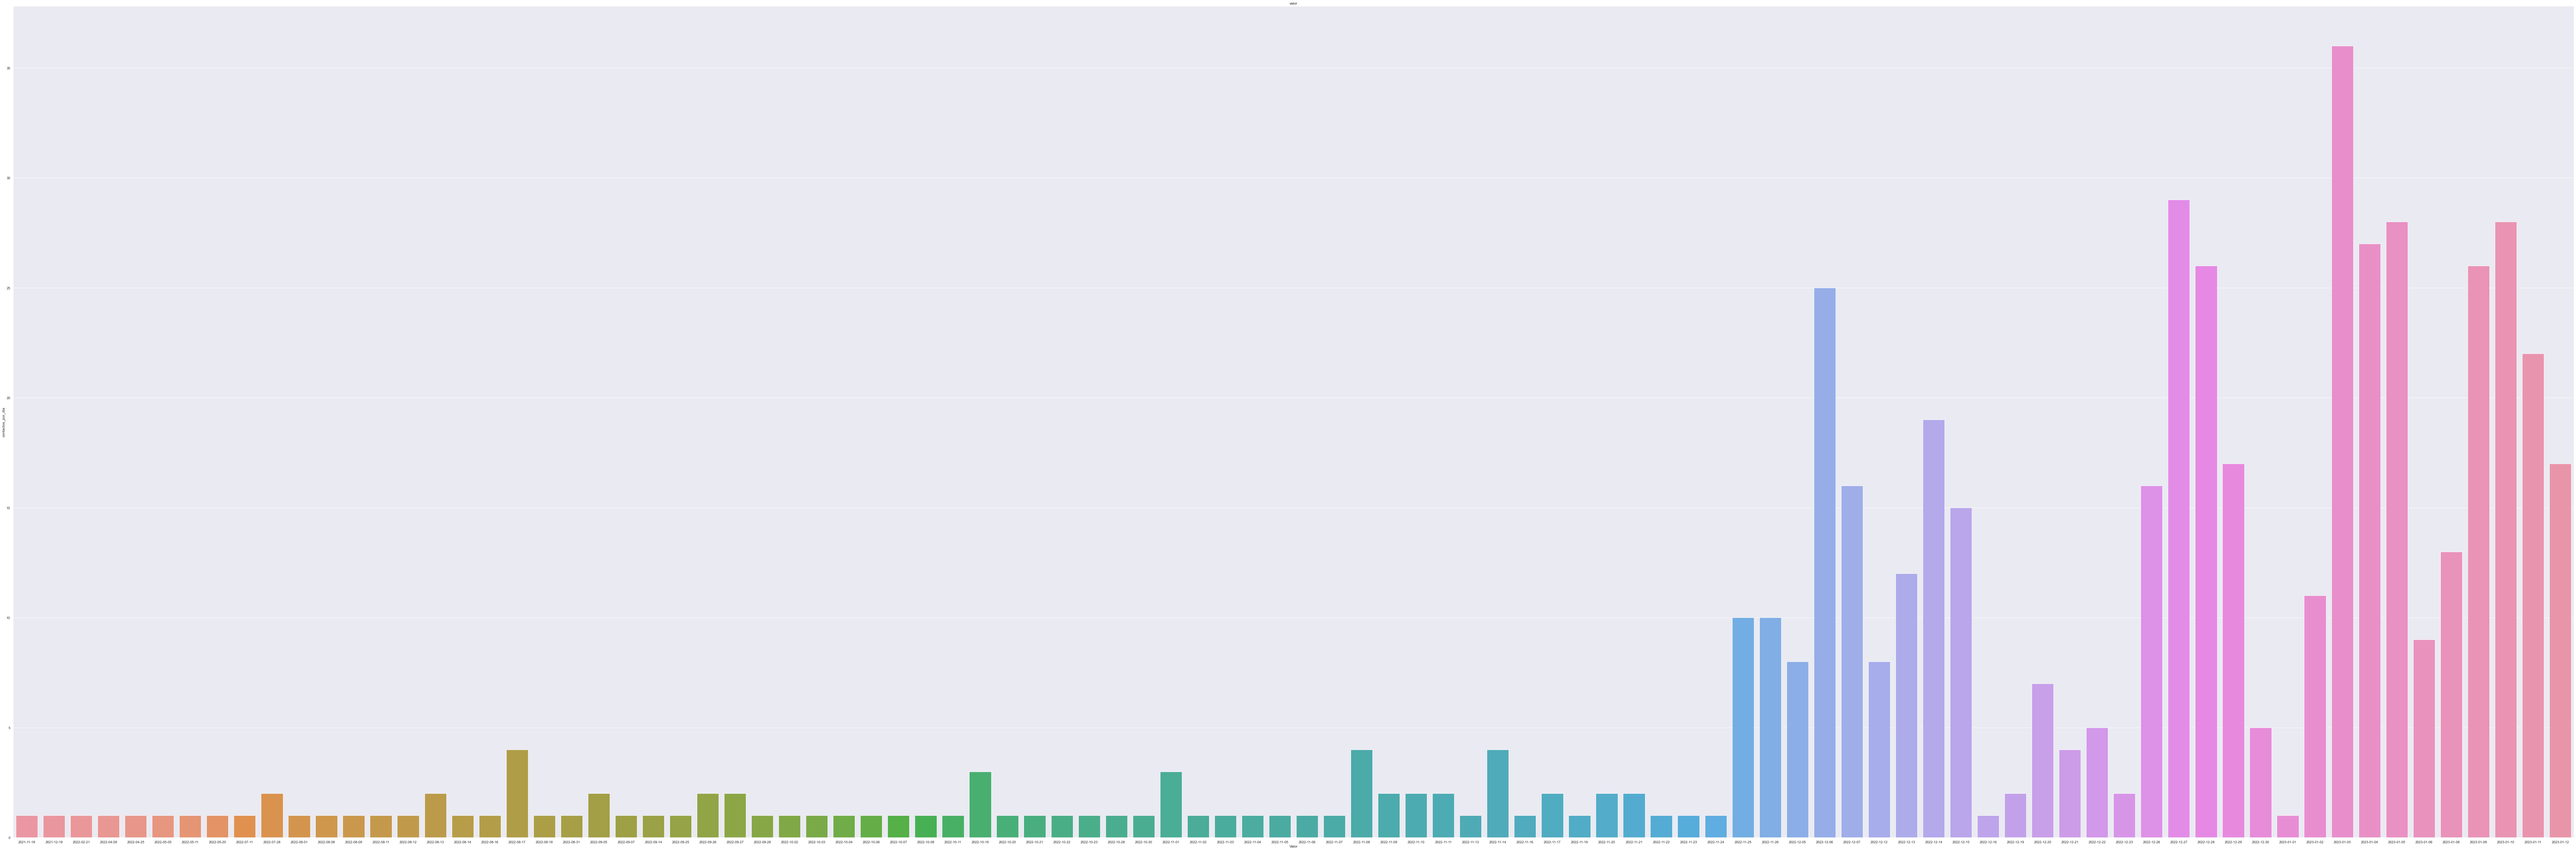

<Figure size 10800x3600 with 0 Axes>

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(150,50)})
venta2.sort_values(by='Fecha de creación', inplace=True)

sns.countplot(x='Fecha de creación', data=venta2)
plt.title('valor')
plt.xlabel('Valor')
plt.ylabel('contactos_por_dia')
plt.show()
plt.savefig('mi_g.jpg', dpi=200, bbox_inches='tight')


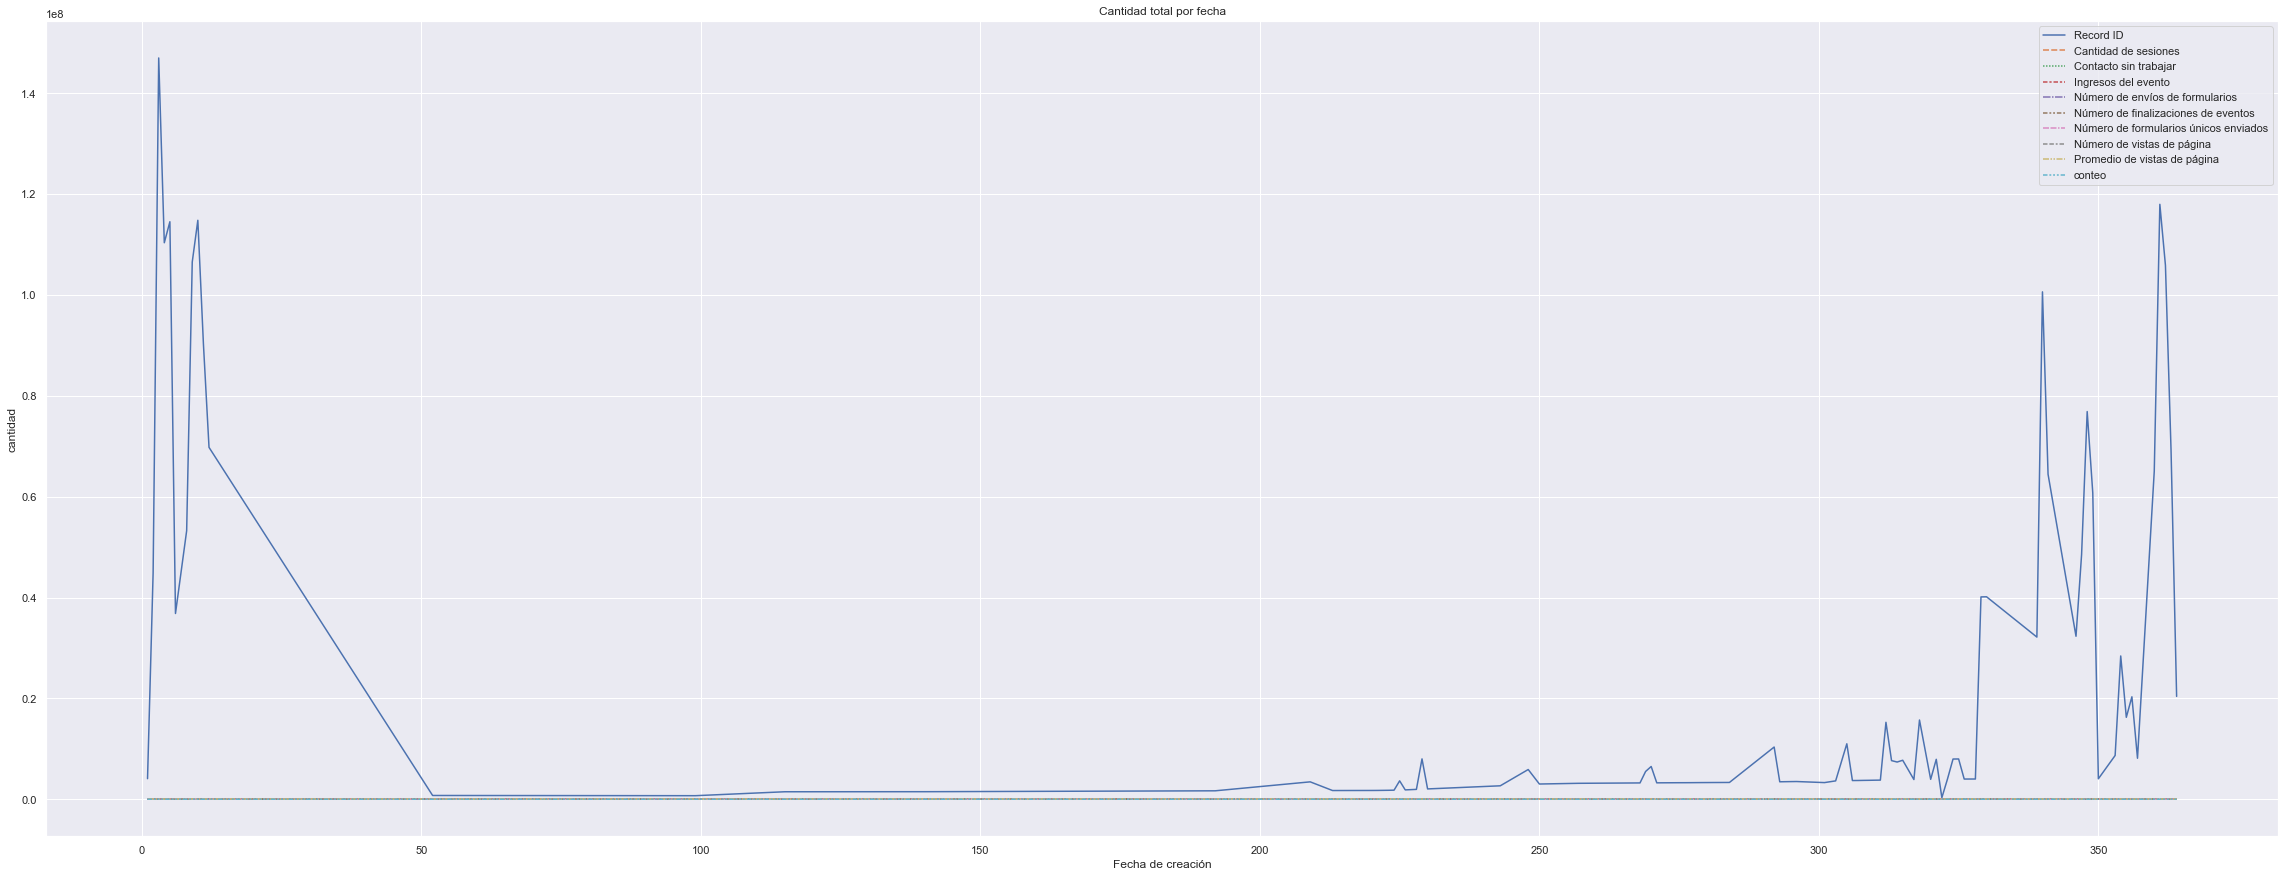

In [80]:
import seaborn as sns
sns.set(rc={'figure.figsize':(40,15)})
venta2.sort_values(by='Fecha de creación', inplace=True)
venta2['Fecha de creación'] = pd.to_datetime(venta2['Fecha de creación'])

df_grouped = venta2.groupby(by=venta2['Fecha de creación'].dt.dayofyear).sum()

# Crear el gráfico
sns.lineplot(data=df_grouped)
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de creación')
plt.ylabel('cantidad')
plt.show()

In [7]:
correlation = venta2['Cantidad de sesiones'].corr(venta2['Número de envíos de formularios'])


In [8]:
correlation

0.916235804052203

In [9]:
correlation_matrix = venta2.corr()

print(correlation_matrix)

                                       Record ID  Cantidad de sesiones  \
Record ID                               1.000000             -0.468990   
Cantidad de sesiones                   -0.468990              1.000000   
Contacto sin trabajar                   0.202897             -0.435507   
Ingresos del evento                          NaN                   NaN   
Número de envíos de formularios        -0.408875              0.916236   
Número de finalizaciones de eventos          NaN                   NaN   
Número de formularios únicos enviados  -0.285937              0.654474   
Número de vistas de página             -0.375779              0.891137   
Promedio de vistas de página           -0.472404              0.298833   
conteo                                       NaN                   NaN   

                                       Contacto sin trabajar  \
Record ID                                           0.202897   
Cantidad de sesiones                               -0.435

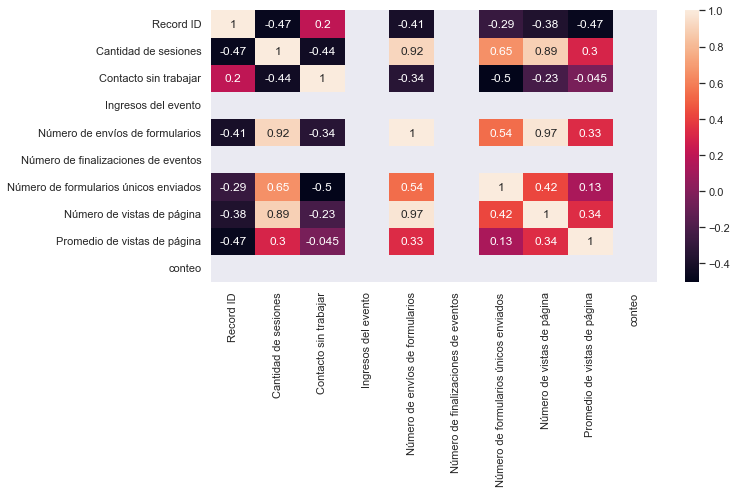

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,5)})


sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [41]:
columns = df.keys()
print(columns)
#df = df.drop('Apellido', axis=1)


Index(['Número de vistas de página', 'Promedio de vistas de página',
       'Correos de marketing con clic', 'Correos de marketing abiertos',
       'Correos de marketing entregados', 'Puntos', 'Negocios asociados'],
      dtype='object')


In [42]:
df

,Número de vistas de página,Promedio de vistas de página,Correos de marketing con clic,Correos de marketing abiertos,Correos de marketing entregados,Puntos,Negocios asociados
0,8.0,8.0,NaN,2.0,6.0,NaN,NaN
1,8.0,8.0,NaN,NaN,3.0,NaN,1.0
2,17.0,8.0,NaN,NaN,4.0,1550.0,NaN
3,24.0,8.0,NaN,NaN,4.0,NaN,NaN
4,1433.0,8.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
560,0.0,0.0,NaN,NaN,3.0,NaN,NaN
561,0.0,0.0,1.0,1.0,8.0,NaN,NaN
562,0.0,0.0,NaN,5.0,10.0,NaN,NaN
563,0.0,0.0,NaN,NaN,6.0,NaN,NaN


                                 Número de vistas de página  \
Número de vistas de página                         1.000000   
Promedio de vistas de página                       0.334927   
Correos de marketing con clic                      0.851495   
Correos de marketing abiertos                      0.596335   
Correos de marketing entregados                    0.562682   
Puntos                                            -0.118979   
Negocios asociados                                      NaN   

                                 Promedio de vistas de página  \
Número de vistas de página                           0.334927   
Promedio de vistas de página                         1.000000   
Correos de marketing con clic                        0.301485   
Correos de marketing abiertos                        0.281452   
Correos de marketing entregados                      0.377133   
Puntos                                              -0.088593   
Negocios asociados                      

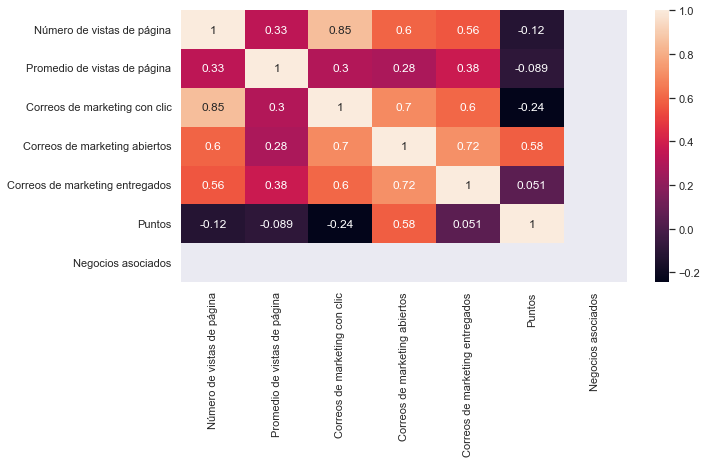

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

print(correlation_matrix)

sns.set(rc={'figure.figsize':(10,5)})


sns.heatmap(correlation_matrix, annot=True)
plt.show()